In [3]:
# Imporing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Loading the Dataset

data = pd.read_csv(r"C:\Users\Shashi\Model Building\Decision Tree\Company_Data.csv")

In [5]:
# Checking the head of data

data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
# Checking the Missing Values

data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
# Checking the duplicates

duplicates = data.duplicated()
sum(duplicates)

0

In [8]:
# Encoding - Label Encoder

from sklearn.preprocessing import LabelEncoder

In [10]:
enc = LabelEncoder()

data['ShelveLoc'] = enc.fit_transform(data['ShelveLoc'])
data['Urban'] = enc.fit_transform(data['Urban'])
data['US'] = enc.fit_transform(data['US'])

In [11]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [12]:
# standardization - normalization Means Min = 0, Max = 1

def norm_fun(i):
    x = (i - i.min())/(i.max() - i.min())
    
    return x

In [15]:
data_norm = norm_fun(data)
data = pd.DataFrame(data_norm)
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.460745,0.489541,0.481389,0.228793,0.510701,0.549671,0.653750,0.514955,0.487500,0.705000,0.645000
std,0.173578,0.156475,0.282687,0.229323,0.295344,0.141776,0.416737,0.294551,0.327566,0.456614,0.479113
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.331285,0.387755,0.219697,0.000000,0.258517,0.455090,0.500000,0.268182,0.250000,0.000000,0.000000
50%,0.460356,0.489796,0.484848,0.172414,0.525050,0.556886,1.000000,0.536364,0.500000,1.000000,1.000000
75%,0.572833,0.591837,0.707071,0.413793,0.778557,0.640719,1.000000,0.745455,0.750000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# Checking the correlation

data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,0.157470,-0.231815,-0.051955,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.157470,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085


<AxesSubplot:>

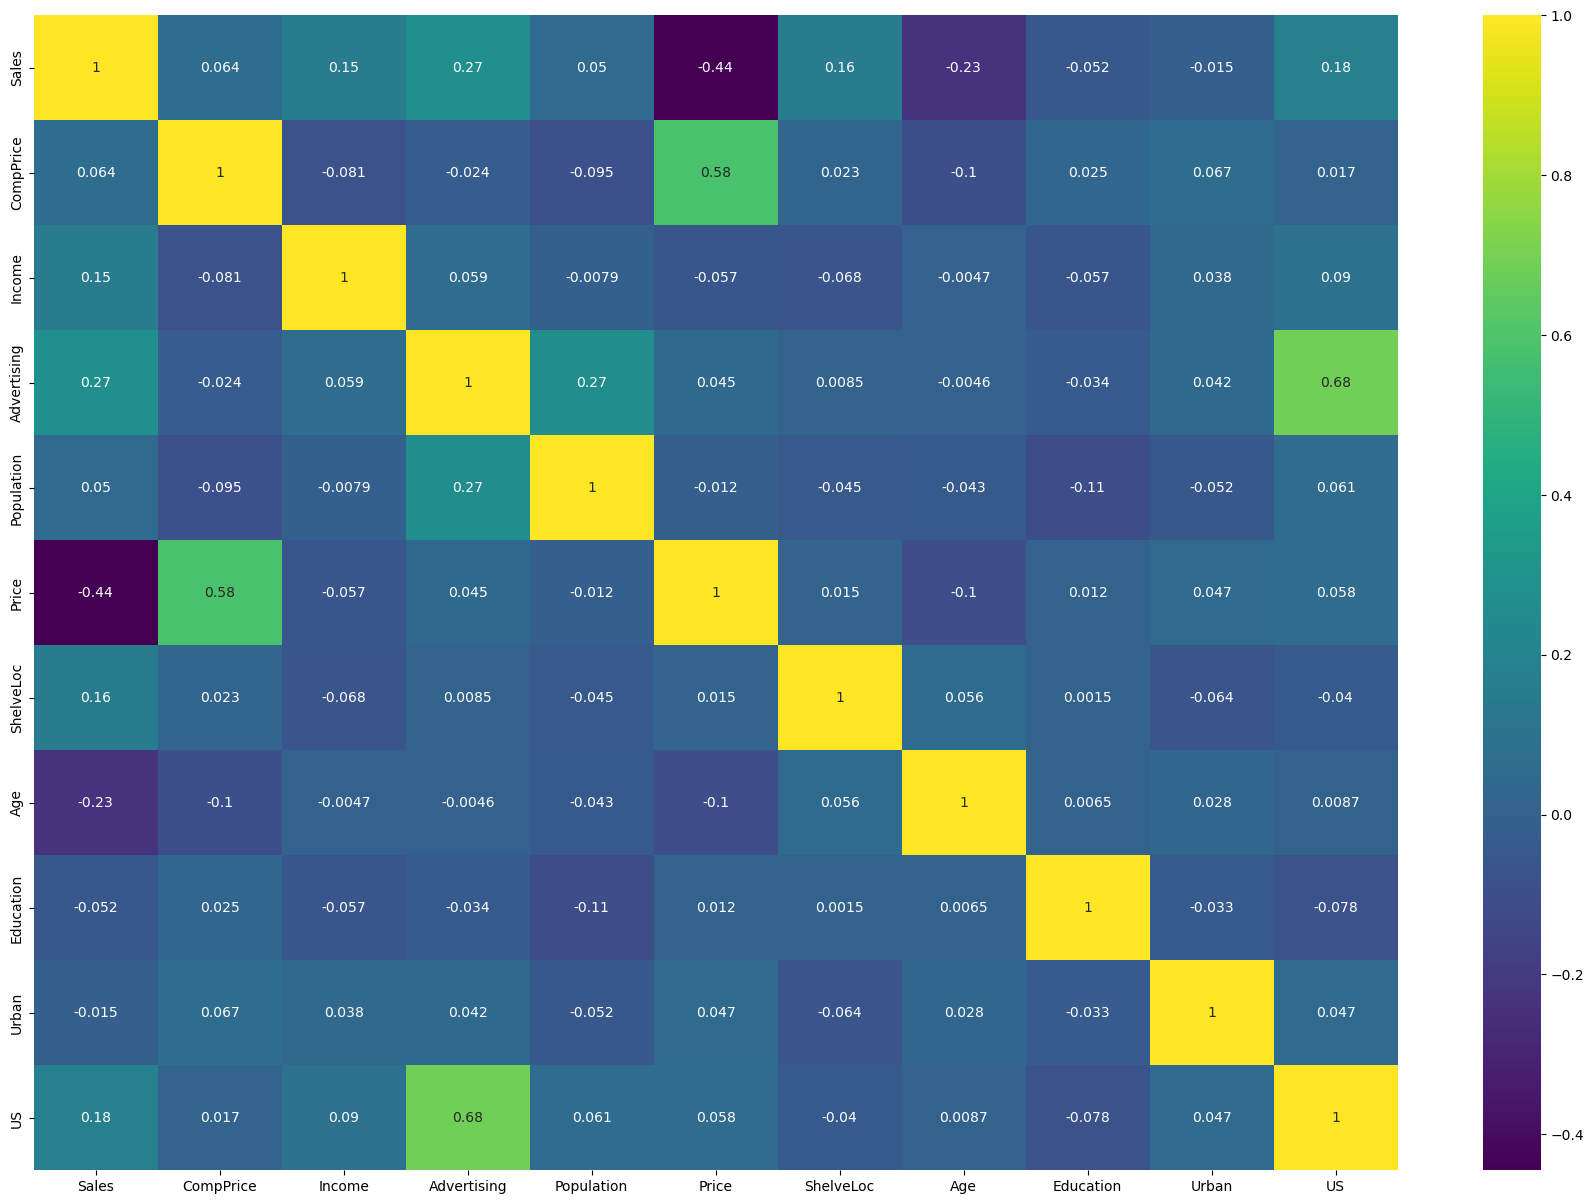

In [18]:
# Heat map

fig = plt.figure(figsize = (22,15))
sns.heatmap(data.corr(), cmap='viridis', annot = True) 

In [20]:
# Splitting the data

X = data.drop('Sales', axis = 1)
Y = data.Sales

In [30]:
# Binarization - Discritization 

x_train = (x_train > 0).astype(int)
y_train = (y_train > 0).astype(int)

x_test = (x_test > 0).astype(int)
y_test = (y_test > 0).astype(int)

X = (X > 0).astype(int)
Y = (Y > 0).astype(int)

In [31]:
# Importing the train test split method

from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [33]:
# Model Building - Decision Tree

from sklearn import tree

In [35]:
model = tree.DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train, y_train)

# Checking the model Score
model.score(X, Y)

0.9975

In [42]:
# Prediction on Test Data
y_pred = model.predict(x_test)
pd.crosstab(y_pred, y_test)

np.mean(y_pred == y_test) # Test Data Accuracy 

1.0

In [43]:
# Prediction on Train Data
y_preds = model.predict(x_train)
pd.crosstab(y_preds, y_train)

np.mean(y_preds == y_train) # Train Data Accuracy

0.996875

In [60]:
# Creating another model called Random Forest

from sklearn.ensemble import RandomForestClassifier

In [61]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [62]:
# Checking the model score

model.score(x_test, y_test)

1.0

In [63]:
# Prediction on Test Data
y_pred = model_rf.predict(x_test)
pd.crosstab(y_pred, y_test)

np.mean(y_pred == y_test) # Test Data Accuracy 

1.0

In [64]:
# Prediction on Train Data
y_pred = model_rf.predict(x_train)
pd.crosstab(y_preds, y_train)

np.mean(y_preds == y_train) # Train Data Accuracy

0.996875

### Result : In this model we used Decision Tree and Random Forest Algorithms, i got above 99% as result, concluding this model is right fit.